In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from losses import flow_matching_loss
from model import create_mlp_model, create_mlp_model_t, train_generative, generator
from plot import FLOW_PLOT_N, time_animation
from sampling import flow_sampling

In [5]:
cov = np.array([[5, 0.5], [0.5, 0.8]])
mu = np.array([10, 15])
x_train_gaus = np.random.multivariate_normal(mu, cov, (10000, ))
x_test_gaus = np.random.multivariate_normal(mu, cov, (10000,))
y_train_gaus = np.zeros(len(x_train_gaus))
y_test_gaus = np.zeros(len(x_test_gaus))

In [6]:
t_dim = 4
mlp_gaus = create_mlp_model(x_train_gaus.shape[-1] + t_dim, x_train_gaus.shape[-1], 3, 16)
mlp_t_gaus = create_mlp_model_t(x_train_gaus.shape[1:-1], t_dim, 2)
optimizer_gaus = tf.keras.optimizers.AdamW(learning_rate=1e-3)

In [7]:
bs = 256
loss = train_generative(mlp_gaus, mlp_t_gaus, optimizer_gaus, generator(x_train_gaus, y_train_gaus, bs=bs), loss=flow_matching_loss, c_theta=None, epochs=20, steps_per_epoch=len(x_train_gaus)//bs)

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

In [8]:
xts_gaus = flow_sampling(len(x_test_gaus), x_test_gaus.shape[1:], mlp_gaus, mlp_t_gaus, c_theta=None, num_steps=10, c=None, keep_middle=True)

100%|██████████| 10/10 [00:00<00:00, 22.20it/s]


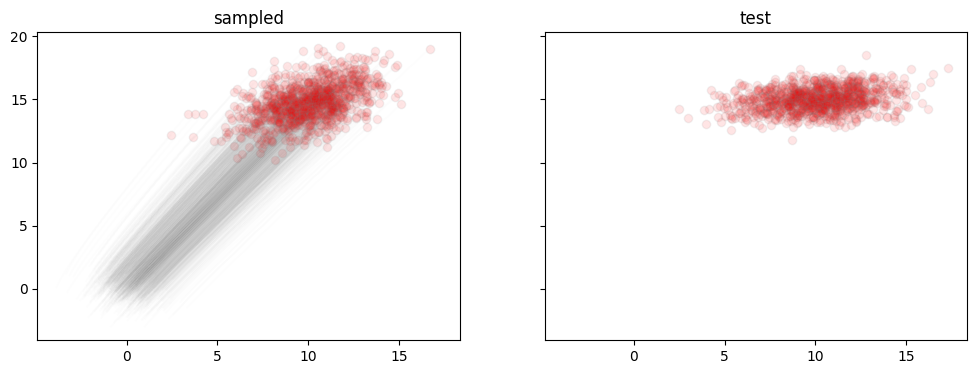

In [9]:
import matplotlib.pyplot as plt
plt.subplots(1,2,figsize=(12,4), sharex=True, sharey=True)
plt.subplot(121)
plt.title("sampled")
plt.plot(xts_gaus[:FLOW_PLOT_N, 0].T, xts_gaus[:FLOW_PLOT_N, 1].T, c='grey', alpha=0.01, zorder=0)
plt.scatter(xts_gaus[:FLOW_PLOT_N, 0, -1], xts_gaus[:FLOW_PLOT_N, 1, -1], c='r', alpha=0.1, zorder=1, edgecolor='grey', linewidth=1)
plt.subplot(122)
plt.title("test")
plt.scatter(x_test_gaus[:FLOW_PLOT_N, ..., 0], x_test_gaus[:FLOW_PLOT_N,..., 1], c='r', alpha=0.1, edgecolor='grey', linewidth=1)

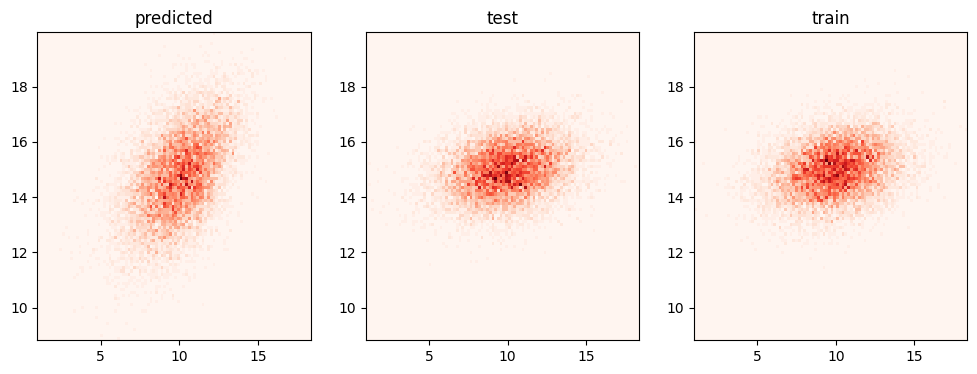

In [10]:
samples = [xts_gaus[..., -1], x_test_gaus, x_train_gaus]
hist2d_kwargs = dict(bins=100, cmap='Reds', density=True, range=[[min([min(s[:, 0]) for s in samples]), max([max(s[:, 0]) for s in samples])],
                                                                 [min([min(s[:, 1]) for s in samples]), max([max(s[:, 1]) for s in samples])]
                                                                 ])
plt.figure(figsize=(12,4))
for i, (title, sample) in enumerate(zip(['predicted', 'test', 'train'], samples)):
  plt.subplot(1,3,i+1)
  plt.title(title)
  plt.hist2d(sample[..., 0], sample[..., 1], **hist2d_kwargs)
plt.show()

In [11]:
time_animation(xts_gaus, interval=100)